In [1]:
df = pd.read_csv('train.csv')

y = df['label']
X = df.iloc[:, 1:]
X = X.values.reshape(42000, 28, 28)

X.shape

(42000, 28, 28)

In [2]:
import matplotlib.pyplot as plt

def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import adam, Adadelta
from keras import regularizers
import numpy as np
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils

X_train0, X_test0 = train_test_split(X, test_size = .2, random_state=0)
y_train0, y_test0= train_test_split(y, test_size = .2, random_state=0)

X_train = X_train0[:, :,  :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

/home/mk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(33600, 28, 28, 1) float32


CNN

In [4]:
# 객체 모델링
class CNN(Sequential):
    def __init__(self):
        super().__init__()
        self.add(Conv2D(5, (5, 5), activation='relu', input_shape=(28, 28, 1), padding='same',kernel_initializer="glorot_uniform"))
        self.add(Conv2D(8, (5, 5), activation='relu', padding='same',kernel_initializer="glorot_uniform"))
        self.add(MaxPooling2D())
        self.add(Dropout(0.1))
        self.add(Flatten())
        self.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))
        self.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam())    

In [6]:
model = CNN()

In [8]:
%%time
hist = model.fit(X_train, Y_train, epochs=10, batch_size=10, validation_data=(X_test, Y_test), verbose=2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 88s - loss: 0.2345 - acc: 0.9284 - val_loss: 0.1009 - val_acc: 0.9708
Epoch 2/10
 - 86s - loss: 0.0814 - acc: 0.9752 - val_loss: 0.0672 - val_acc: 0.9804
Epoch 3/10
 - 87s - loss: 0.0588 - acc: 0.9812 - val_loss: 0.0501 - val_acc: 0.9851
Epoch 4/10
 - 86s - loss: 0.0460 - acc: 0.9861 - val_loss: 0.0514 - val_acc: 0.9863
Epoch 5/10
 - 98s - loss: 0.0401 - acc: 0.9871 - val_loss: 0.0504 - val_acc: 0.9858
Epoch 6/10
 - 101s - loss: 0.0324 - acc: 0.9897 - val_loss: 0.0635 - val_acc: 0.9826
Epoch 7/10
 - 102s - loss: 0.0307 - acc: 0.9897 - val_loss: 0.0515 - val_acc: 0.9856
Epoch 8/10
 - 106s - loss: 0.0261 - acc: 0.9919 - val_loss: 0.0584 - val_acc: 0.9861
Epoch 9/10
 - 96s - loss: 0.0229 - acc: 0.9924 - val_loss: 0.0585 - val_acc: 0.9861
Epoch 10/10
 - 96s - loss: 0.0215 - acc: 0.9931 - val_loss: 0.0553 - val_acc: 0.9869
CPU times: user 31min 54s, sys: 3min 51s, total: 35min 45s
Wall time: 15min 43s


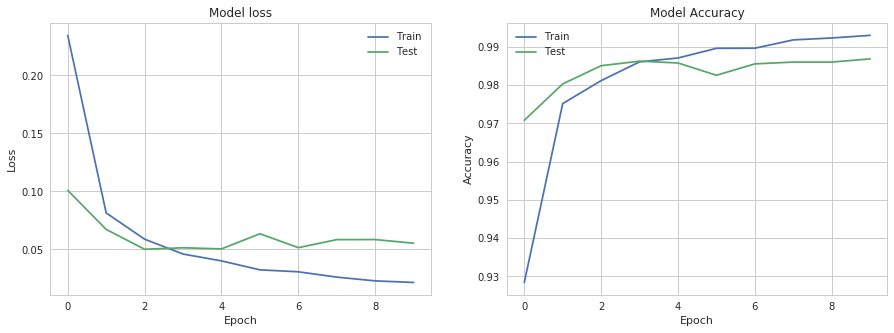

In [9]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_loss(hist)
plt.subplot(122)
plot_acc(hist)

In [10]:
test = pd.read_csv('test.csv')

In [11]:
test = test.values.reshape(28000, 28, 28)
test = test[:, :, :, np.newaxis].astype('float32') / 255.0

y_test = model.predict(test)

In [12]:
y_test.shape

(28000, 10)

In [14]:
y_test[0]

array([7.4433921e-14, 5.2890933e-20, 1.0000000e+00, 9.6187770e-16,
       1.4286950e-16, 5.8763874e-16, 6.5471332e-17, 7.4779774e-16,
       2.2803435e-14, 7.5948953e-13], dtype=float32)

In [25]:
y_test = [np.argmax(i) for i in y_test]

In [26]:
answer = pd.Series(y_test, index=list(range(1,28000+1))).reset_index()
answer.rename(columns={'index':'ImageId', 0:'Label'}, inplace=True)
answer.to_csv('ans.csv', index=False)

kaggle score - 0.98614